In [61]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_decomposition import CCA
import scipy.stats

In [62]:
def nwp_error(target, station, df):
    """
    Calculate the error between NWP model data and NYSM data for a specific target variable.

    Args:
        target (str): The target variable name (e.g., 't2m' for temperature).
        station (str): The station identifier for which data is being compared.
        df (pd.DataFrame): The input DataFrame containing NWP and NYSM data.

    Returns:
        df (pd.DataFrame): The input DataFrame with the 'target_error' column added.

    This function calculates the error between the NWP (Numerical Weather Prediction) modeldata and NYSM (New York State Mesonet) data for a specific target variable at a given station. The error is computed by subtracting the NYSM data from the NWP model data.
    """

    # Define a dictionary to map NWP variable names to NYSM variable names.
    vars_dict = {
        "t2m": "tair",
        "mslma": "pres",
        "tp": "precip_total",
        "u_total": "wspd_sonic_mean",
        # Add more variable mappings as needed.
    }

    # Get the NYSM variable name corresponding to the target variable.
    nysm_var = vars_dict.get(target)

    # Calculate the 'target_error' by subtracting NYSM data from NWP model data.
    target_error = df[f"{target}_{station}"] - df[f"{nysm_var}_{station}"]
    df.insert(loc=(1), column=f"{station}_target_error", value=target_error)

    return df

In [63]:
clim_div_df = pd.read_csv("/home/aevans/nwp_bias/src/landtype/data/nysm.csv")

In [64]:
clim_div_df = clim_div_df[clim_div_df["climate_division_name"] == "Mohawk Valley"]
stations = clim_div_df["stid"].tolist()
stations

['CAMD', 'HERK', 'JOHN', 'OPPE', 'SPRA', 'WEST']

In [65]:
df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20240621/SPRA/06_21_2024_14:52:05_full_SPRA_CORRELATION.parquet"
)
df.head()

,valid_time,valid_time_cos,valid_time_sin,target_error,t2m_CAMD,sh2_CAMD,d2m_CAMD,r2_CAMD,u10_CAMD,v10_CAMD,...,relh_WEST,srad_WEST,pres_WEST,mslp_WEST,wspd_sonic_mean_WEST,wspd_sonic_WEST,wmax_sonic_WEST,wdir_sonic_WEST,snow_depth_WEST,precip_total_WEST
0,2018-01-01 16:00:00,0.999853,0.017166,1.252294,-23.822256,0.00039,-27.665533,71.099998,-0.335041,0.032753,...,69.338226,333.268188,1004.473999,1007.870300,1.211264,1.273610,2.707442,63.085281,0.059557,0.0
1,2018-01-01 17:00:00,0.999853,0.017166,0.702930,-21.200110,0.00049,-25.236411,70.199997,-0.164658,0.586841,...,61.852631,429.464813,1003.306030,1006.588623,0.516806,0.381581,0.754610,152.326797,0.060917,0.0
2,2018-01-01 18:00:00,0.999853,0.017166,0.911966,-19.245795,0.00065,-21.984259,79.000000,-0.862186,0.063372,...,60.908211,420.306610,1002.354004,1005.292847,1.021998,0.563358,1.272481,92.698997,0.058384,0.0
3,2018-01-01 19:00:00,0.999853,0.017166,-0.314967,-17.692221,0.00074,-20.621466,78.300003,-0.675547,0.307129,...,60.364052,291.977112,1001.375977,1004.217896,1.212483,1.069508,1.490641,75.131889,0.058275,0.0
4,2018-01-01 20:00:00,0.999853,0.017166,-0.847188,-16.266638,0.00082,-19.354300,77.500000,-0.978044,0.145276,...,63.497349,158.532806,1000.788025,1003.661682,1.484138,1.338929,2.354090,61.432831,0.061441,0.0


In [66]:
for s in stations:
    df = nwp_error("t2m", s, df)

In [67]:
df.head()

,valid_time,WEST_target_error,SPRA_target_error,OPPE_target_error,JOHN_target_error,HERK_target_error,CAMD_target_error,valid_time_cos,valid_time_sin,target_error,...,relh_WEST,srad_WEST,pres_WEST,mslp_WEST,wspd_sonic_mean_WEST,wspd_sonic_WEST,wmax_sonic_WEST,wdir_sonic_WEST,snow_depth_WEST,precip_total_WEST
0,2018-01-01 16:00:00,0.115633,1.252294,0.475824,1.587463,-0.369376,-3.548096,0.999853,0.017166,1.252294,...,69.338226,333.268188,1004.473999,1007.870300,1.211264,1.273610,2.707442,63.085281,0.059557,0.0
1,2018-01-01 17:00:00,-0.557820,0.702930,0.262100,0.727491,-0.581120,-3.703780,0.999853,0.017166,0.702930,...,61.852631,429.464813,1003.306030,1006.588623,0.516806,0.381581,0.754610,152.326797,0.060917,0.0
2,2018-01-01 18:00:00,-3.070195,0.911966,-0.302004,0.691125,-0.712435,-3.635265,0.999853,0.017166,0.911966,...,60.908211,420.306610,1002.354004,1005.292847,1.021998,0.563358,1.272481,92.698997,0.058384,0.0
3,2018-01-01 19:00:00,-3.888281,-0.314967,-0.530667,-0.035177,-1.159896,-4.001611,0.999853,0.017166,-0.314967,...,60.364052,291.977112,1001.375977,1004.217896,1.212483,1.069508,1.490641,75.131889,0.058275,0.0
4,2018-01-01 20:00:00,-3.549033,-0.847188,-1.228848,-0.194008,-1.423968,-2.609278,0.999853,0.017166,-0.847188,...,63.497349,158.532806,1000.788025,1003.661682,1.484138,1.338929,2.354090,61.432831,0.061441,0.0


In [68]:
for k in df.columns:
    print(k)

valid_time
WEST_target_error
SPRA_target_error
OPPE_target_error
JOHN_target_error
HERK_target_error
CAMD_target_error
valid_time_cos
valid_time_sin
target_error
t2m_CAMD
sh2_CAMD
d2m_CAMD
r2_CAMD
u10_CAMD
v10_CAMD
tp_CAMD
mslma_CAMD
orog_CAMD
tcc_CAMD
asnow_CAMD
cape_CAMD
dswrf_CAMD
dlwrf_CAMD
gh_CAMD
u_total_CAMD
u_dir_CAMD
new_tp_CAMD
t2m_HERK
sh2_HERK
d2m_HERK
r2_HERK
u10_HERK
v10_HERK
tp_HERK
mslma_HERK
orog_HERK
tcc_HERK
asnow_HERK
cape_HERK
dswrf_HERK
dlwrf_HERK
gh_HERK
u_total_HERK
u_dir_HERK
new_tp_HERK
t2m_JOHN
sh2_JOHN
d2m_JOHN
r2_JOHN
u10_JOHN
v10_JOHN
tp_JOHN
mslma_JOHN
orog_JOHN
tcc_JOHN
asnow_JOHN
cape_JOHN
dswrf_JOHN
dlwrf_JOHN
gh_JOHN
u_total_JOHN
u_dir_JOHN
new_tp_JOHN
t2m_OPPE
sh2_OPPE
d2m_OPPE
r2_OPPE
u10_OPPE
v10_OPPE
tp_OPPE
mslma_OPPE
orog_OPPE
tcc_OPPE
asnow_OPPE
cape_OPPE
dswrf_OPPE
dlwrf_OPPE
gh_OPPE
u_total_OPPE
u_dir_OPPE
new_tp_OPPE
t2m_SPRA
sh2_SPRA
d2m_SPRA
r2_SPRA
u10_SPRA
v10_SPRA
tp_SPRA
mslma_SPRA
orog_SPRA
tcc_SPRA
asnow_SPRA
cape_SPRA
dswrf_SPRA
dlw

In [69]:
def filter_columns(df, key):
    # Filter columns containing 't2m' in their names
    filtered_columns = [col for col in df.columns if key in col]
    # Return a new DataFrame with only the filtered columns
    return df[filtered_columns]

In [70]:
var_q = "precip_total"

In [71]:
df = filter_columns(df, var_q)

In [72]:
# df = df.iloc[:,1:7]
df.head()

,precip_total_CAMD,precip_total_HERK,precip_total_JOHN,precip_total_OPPE,precip_total_SPRA,precip_total_WEST
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


# Pearson Correlation

In [73]:
# Initialize a list to store data for DataFrame construction.
data = []

for s in stations:
    x_column = f"{var_q}_{s}"
    for c in df.columns:
        if c == x_column:
            continue
        # Get station ID from the column name.
        stid = c[-4:]
        pers = scipy.stats.pearsonr(df[x_column], df[c])

        # Append a tuple with all necessary information.
        data.append((stid, s, pers[0], pers[1]))

# Create a DataFrame from the list of tuples.
corr_df = pd.DataFrame(data, columns=["StationID", "Target", "Correlation", "P_Score"])

# Pivot the DataFrame to multi-index columns (station-target pairs).
corr_df = corr_df.pivot(
    index="StationID", columns="Target", values=["Correlation", "P_Score"]
)

In [74]:
corr_df

Correlation                                                    \
Target           CAMD      HERK      JOHN      OPPE      SPRA      WEST   
StationID                                                                 
CAMD              NaN  0.235306  0.199898  0.209905  0.185960  0.373850   
HERK         0.235306       NaN  0.325156  0.556685  0.349228  0.416076   
JOHN         0.199898  0.325156       NaN  0.489244  0.657842  0.242747   
OPPE         0.209905  0.556685  0.489244       NaN  0.519737  0.308203   
SPRA         0.185960  0.349228  0.657842  0.519737       NaN  0.247229   
WEST         0.373850  0.416076  0.242747  0.308203  0.247229       NaN   

          P_Score                           
Target       CAMD HERK JOHN OPPE SPRA WEST  
StationID                                   
CAMD          NaN  0.0  0.0  0.0  0.0  0.0  
HERK          0.0  NaN  0.0  0.0  0.0  0.0  
JOHN          0.0  0.0  NaN  0.0  0.0  0.0  
OPPE          0.0  0.0  0.0  NaN  0.0  0.0  
SPRA          0.0  0.0  0.0  0.0  NaN  0.0  
WEST          0.0  0.0  0.0  0.0  0.0  NaN

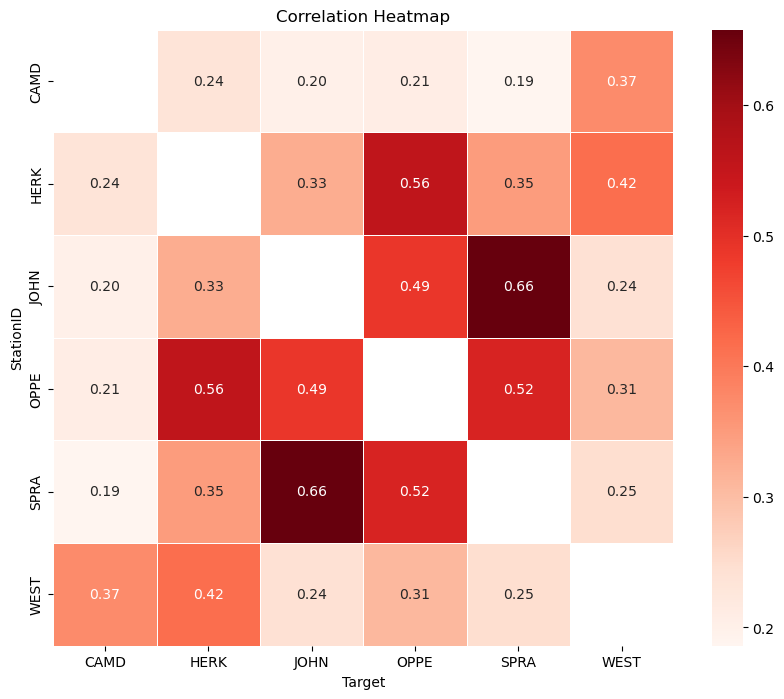

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_heatmap(df):
    # Assuming 'Correlation' is the first level of a multi-index column in the DataFrame
    # We extract just the correlation data for the heatmap.
    correlation_data = df["Correlation"]

    # Setting up the figure size for the heatmap.
    plt.figure(figsize=(10, 8))

    # Creating the heatmap using seaborn.
    # 'annot=True' will display the correlation values in the heatmap cells.
    # 'cmap' defines the color map. 'coolwarm' is a good choice for correlation as it centers around neutral color for zero.
    sns.heatmap(correlation_data, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)

    # Adding title and labels
    plt.title("Correlation Heatmap")
    plt.xlabel("Target")
    plt.ylabel("StationID")

    # Displaying the plot.
    plt.show()


# Example of how you would call this function:
plot_correlation_heatmap(corr_df)

# Canonical Correlation

In [76]:
# Initialize a list to store data for DataFrame construction.
data = []

for s in stations:
    x_column = f"{var_q}_{s}"
    temp_df = df.copy()

    # Get station ID from the column name.
    stid = c[-4:]
    X = temp_df.drop(columns=x_column)
    Y = temp_df[[x_column]]
    X_mc = (X - X.mean()) / (X.std())
    Y_mc = (Y - Y.mean()) / (Y.std())
    ca = CCA(n_components=1)
    ca.fit(X_mc, Y_mc)
    X_c, Y_c = ca.transform(X_mc, Y_mc)
    corr = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]
    print(corr)

    # Append a tuple with all necessary information.
    data.append((s, corr))

# Create a DataFrame from the list of tuples.
corr_df_CCA = pd.DataFrame(data, columns=["StationID", "Correlation"])


corr_df_CCA = corr_df_CCA.set_index("StationID")

corr_df_CCA

0.3967099640583308
0.6157273618952998
0.6830844137000799
0.6726175496013749
0.6977019282887088
0.5117768150455331


,Correlation
StationID,
CAMD,0.396710
HERK,0.615727
JOHN,0.683084
OPPE,0.672618
SPRA,0.697702
WEST,0.511777


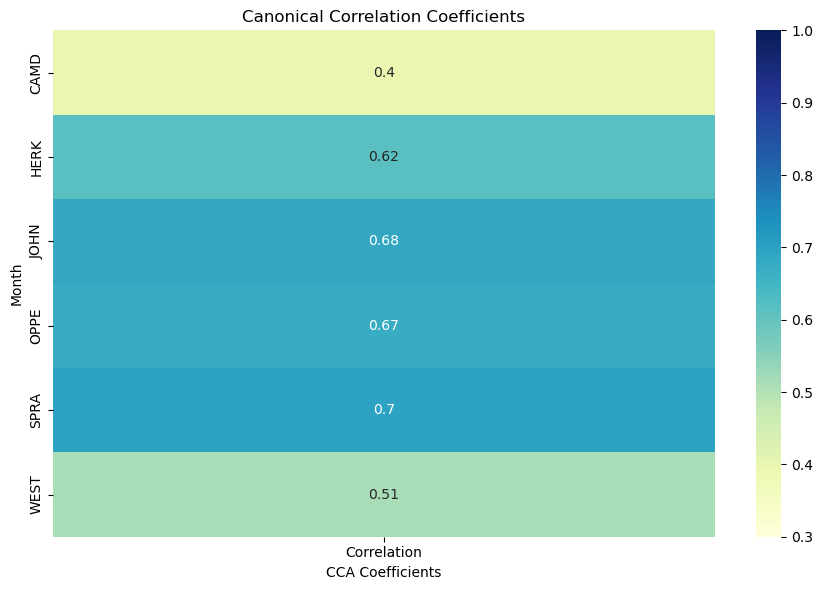

In [77]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title(f"Canonical Correlation Coefficients")
ax = sns.heatmap(corr_df_CCA, vmin=0.3, vmax=1, cmap=cm.YlGnBu, annot=True)
ax.set_ylabel("Month")
ax.set_xlabel("CCA Coefficients")
plt.tight_layout()

# Detrended CCA

In [78]:
pip install dcca

/bin/bash: /home/aevans/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [79]:
import dcca

In [80]:
data = []

for s in stations:
    x_column = f"{var_q}_{s}"

    for c in df.columns:
        if c == x_column:
            continue
        # Get station ID from the column name.
        stid = c[-4:]
        a = np.array(df[x_column])
        b = np.array(df[c])
        corrs = []
        for t in np.arange(0, 4):  # Time lags from 0 to 9
            _dc = dcca.detrended_correlation(x=a, y=b, time_scale=1, time_lag=t)
            corrs.append(_dc)

        # Flatten the corrs list and append it with station ID and target to data
        data.append([stid, s] + corrs)

# Assuming there are 10 time lags, create column names for each time lag
column_names = ["StationID", "Target"] + [f"Corr_Lag_{i}" for i in range(4)]

# Create a DataFrame from the list of tuples.
corr_df_DCCA = pd.DataFrame(data, columns=column_names)

In [81]:
# Correct the list comprehension to filter out 'Target' and 'StationID'
columns_to_use = [c for c in corr_df_DCCA.columns if c != "Target" and c != "StationID"]

In [82]:
corr_df_DCCA = corr_df_DCCA.pivot(
    index="StationID", columns="Target", values=columns_to_use
)

In [83]:
corr_df_DCCA

Corr_Lag_0                                                    \
Target          CAMD      HERK      JOHN      OPPE      SPRA      WEST   
StationID                                                                
CAMD             NaN  0.215746  0.177200  0.181971  0.163031  0.296782   
HERK        0.215746       NaN  0.320486  0.517388  0.327356  0.329352   
JOHN        0.177200  0.320486       NaN  0.416282  0.535591  0.203850   
OPPE        0.181971  0.517388  0.416282       NaN  0.435799  0.260141   
SPRA        0.163031  0.327356  0.535591  0.435799       NaN  0.207229   
WEST        0.296782  0.329352  0.203850  0.260141  0.207229       NaN   

          Corr_Lag_1                                ... Corr_Lag_2            \
Target          CAMD      HERK      JOHN      OPPE  ...       JOHN      OPPE   
StationID                                           ...                        
CAMD             NaN  0.150711  0.135436  0.144981  ...   0.112252  0.113700   
HERK        0.293115       NaN  0.238560  0.260490  ...   0.185955  0.196551   
JOHN        0.209337  0.386345       NaN  0.441548  ...        NaN  0.299444   
OPPE        0.260636  0.477003  0.303821       NaN  ...   0.229477       NaN   
SPRA        0.194438  0.415356  0.349489  0.395434  ...   0.250906  0.244004   
WEST        0.322454  0.211602  0.176279  0.178209  ...   0.143522  0.130854   

                              Corr_Lag_3                                \
Target         SPRA      WEST       CAMD      HERK      JOHN      OPPE   
StationID                                                                
CAMD       0.106052  0.146740        NaN  0.089588  0.100355  0.098467   
HERK       0.173097  0.242933   0.205193       NaN  0.162235  0.150541   
JOHN       0.276911  0.267881   0.216429  0.211146       NaN  0.205586   
OPPE       0.210698  0.304393   0.248690  0.168974  0.184550       NaN   
SPRA            NaN  0.292221   0.213787  0.175060  0.196060  0.200114   
WEST       0.117471       NaN   0.172819  0.111957  0.105962  0.109786   

                               
Target         SPRA      WEST  
StationID                      
CAMD       0.084807  0.134370  
HERK       0.152869  0.172872  
JOHN       0.223507  0.233221  
OPPE       0.172345  0.198424  
SPRA            NaN  0.188728  
WEST       0.092216       NaN  

[6 rows x 24 columns]

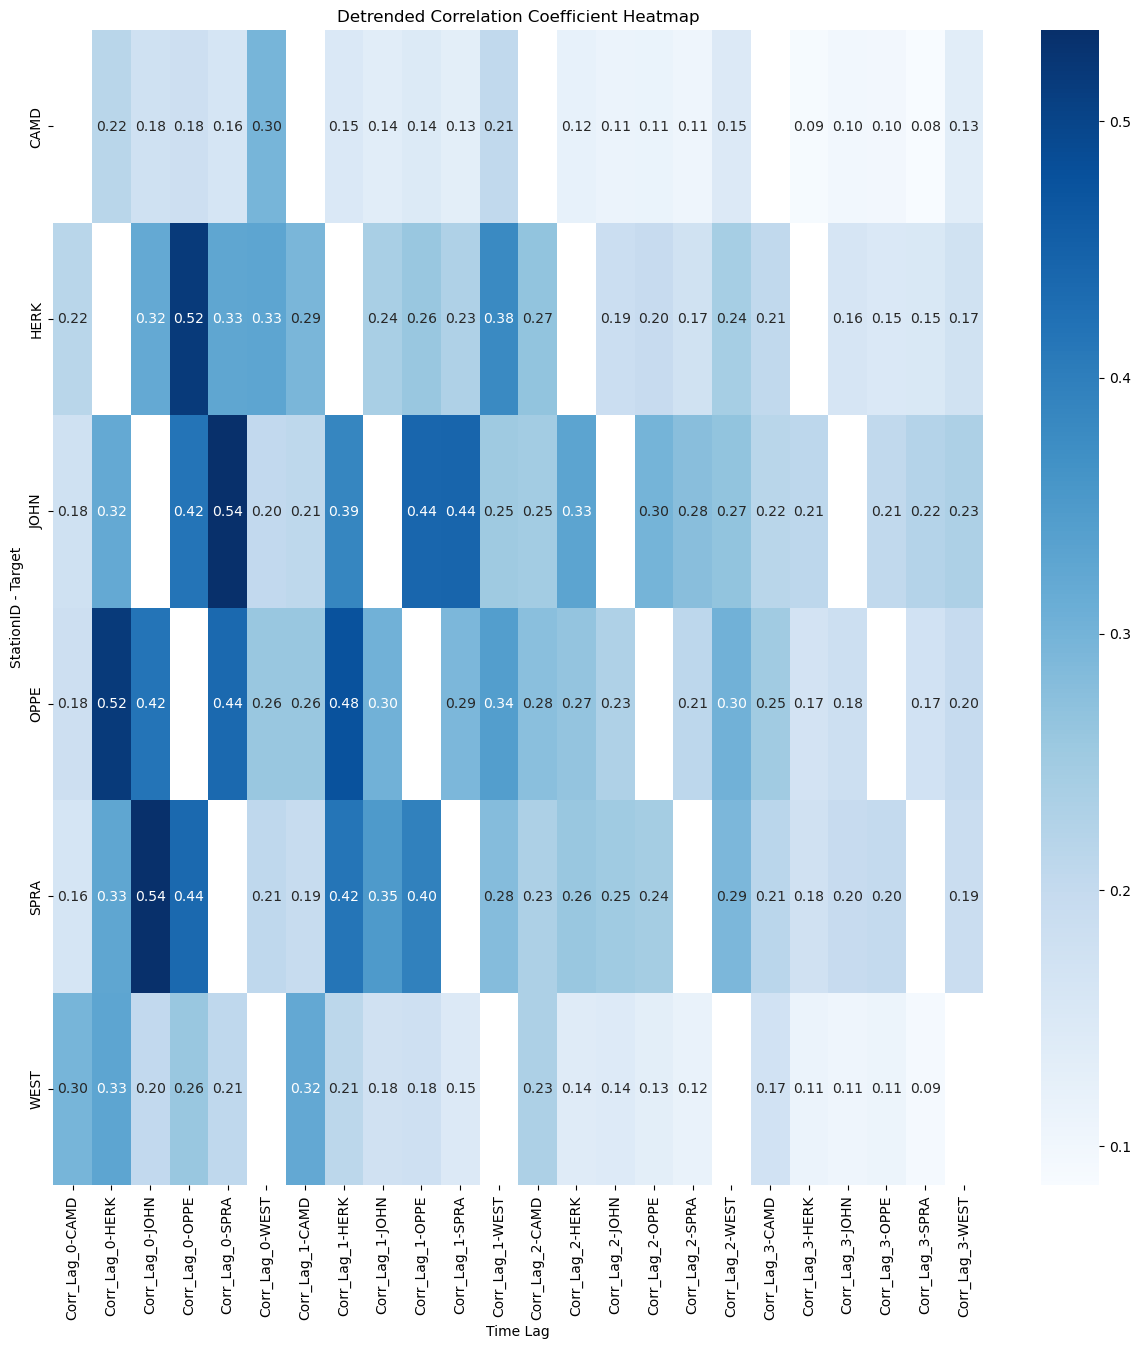

In [84]:
# Create the heatmap
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
ax = sns.heatmap(corr_df_DCCA, annot=True, cmap="Blues", cbar=True, fmt=".2f")
ax.set_title("Detrended Correlation Coefficient Heatmap")
ax.set_xlabel("Time Lag")
ax.set_ylabel("StationID - Target")
plt.show()